# Раздел 3: Обыкновенные дифференциальные уравнения

## Лабораторная работа № 3: Метод Рунге-Кутты (Задание 1)
 
Выполнил студнет 854 группы ФЭФМ
  
_Артемий Атепалихин_

## Цель:

- Получить численное ДУ первого порядка методом Рунге-Кутты 4-го порядка
- Определить погрешность вычисления
- Построить график

## Теория
### Общие положения

Общий вид ДУ:

$$\frac{dy}{dx} = f(x,y)$$

Положим, что величина сеточной функции в узле $x_0 = X_0$ равняется начальному условия $y_0 = y^0$, значение в узлах сетки находим по формуле:

$$y_{n+1} = y(x_n+h) = y(x_n) + h \sum\limits_{i=1}^s b_i f_i \left( x_n + c_i h, y_n + h \sum\limits_{j=1}^{i-1} a_{ij} f_j \right)$$

$$f_s = f \left( x_n + c_s h_s, y_n + h \sum\limits_{j=1}^{s-1} a_{sj}f_j \right) = f_s(x_s, z_s)$$

$$x_s = x_n + c_sh,\;\;\;\;\;\; z_s = y_n + h \sum\limits_{j=1}^{s-1} a_{sj}f_j$$

Предполагается, что $y(x_n)$ известно и имеет конкретное значение. При нахождении $y_1$ в качестве $y(x_n)$, $n = 0$ берется $y(x_0) = y_0 = y^0$ и тд.

Рассмотрим функцию 

$$\varphi(h) = y(x_n + h) - y(x_n) - h \sum \limits_{i=1}^s b_i f_i (x_i, z_i) = \sum\limits_{k=0}^s \frac{\varphi^{(k)}(0)}{k!} h^k + \frac{\varphi^{(s+1)}(\theta h)}{(s+1)!} h^{s+1},\;\;\; 0 \leq \theta \leq 1$$

и определим поярдок сходимост метода.

__Определение.__ Разностный метод Рунге_Кутты, задаваемый соотношениями выше имеет $q$ порядок сходимости, если:

$$\varphi(0) = \varphi'(0) = ... = \varphi^{(q+1)}(0) = 0,\;\;\; a\varphi_n^{(q+1)} \neq 0, \;\;\; q \leq S$$


### Формулы метода РК 4-го порядка

Вычислим первые  четыре производные по $h$ от функции $\varphi(h)$, пологая $S = 4$ и дифференцируем ее как сложную фукнцию. Надо будет найти производные от функции $\frac{dy}{dx} = f(x,y)$. Также потребуется первые три производные по $h$ от функций $f_i (x_i, z_i)$, $i = 1, 2, 3, 4.$

Согласно алгоритму для РК первого порядка требуем условие $\varphi'_h(0) = 0$, учитывая $y'_x = f$. Так как это равенство должно выполняться для произвольной непрерывно диффернецируемой функции $f(x,y)$ из правой части необходимо, чтобы :

$$b_1 + b_2 + b_3 + b_4 = 1 \;\;\; (f)$$

При увеличении порядка бужем наращивать условия, например для 2-го: $\varphi''_{hh}(0) = 0$ и $\forall f'_x, f'_y$ выполняется:

$$2b_2 c_2 + 2b_3 c_3 + 2b_4 c_4 = 1 \;\;\; (f'_x)$$
$$2b_2a_{21} + 2b_3(a_{31} + a_{32}) + 2b_4 (a_{41} + a_{42} + a_{43}) = 1 \;\;\; (f'_y f)$$

Далее аналогично до 4-го порядка.

__Классический 4-стадийный методкРК 4-го порядка точности__ 
 
$$f_1 = f(x_n, y_n); \;\;\; f_2 = f\left( x_n + \frac{h}{2}, y_n + \frac{h}{2} f_1 \right);$$

$$f_3 = f\left( x_n + \frac{h}{2}, y_n + \frac{h}{2} f_2 \right); \;\;\; f_4 = f(x_n + h, y_n + hf_3).$$

$$y_{n+1} = y_n + \frac{h}{6} (f_1 + 2f_2 +2f_3 + f_4)$$

Таблица Бутчера:
 
 0 | 0 | - | - | -
  --|--|--|--|--
1/2 | 1/2| 0 | - | -   
1/2 |0 |0| 1/2|0
1  |0|0|1|0
 - |1/6| 2/6 |2/6 | 1/6

##  Добавим нужные библиотеки, введем начальные данные

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
x_lim = [1, 2]
x_0, y_0 = 1, 1
N = 11
k = 4
eps = 10**(-4)
def func(x, y):
    return (2*x**3 + x**2 - y**2)/(2*x**2 * y)

## Запишем таблицу Бутчера для РК 4

In [9]:
c = np.array([1/2, 1/2, 1])
tri_a = np.array([1/2, 0, 1/2, 0, 0, 1])
b = np.array([1/6, 2/6, 2/6, 1/6])

##  Введем функции для подсчета

In [10]:
#подсчет порядков РК
def stepped(x, y, f, h):

    f[0] = func(x, y)
    for i in range(1, b.size):
        f[i] = (func(x+c[i-1]*h, y + h*sum(f[j]*tri_a[i*(i-1)//2+j] for j in range(i) ) ))

    return y+h *np.dot(b, f)

In [11]:
def calc(h, Number_of_points, end, calc_err = False):
    x_res = np.linspace(x_0, end, num = Number_of_points, endpoint = True)
    y_res = np.empty(Number_of_points)

    if(calc_err):
        y_prob_res = np.empty(Number_of_points)

    if(h > 0):
        num = 1
        y_res[0] = y_0
        if(calc_err):
            y_prob_res[0] = y_0
    else:
        num = 1
        y_res[Number_of_points-1] = y_0
        if(calc_err):
            y_prob_res[Number_of_points-1] = y_0

    y = y_0
    f = np.empty(b.size)

    #Считаем ошибки
    if(calc_err):
        i = 0
        error = 0

    for x in np.arange(x_0, end, h):

        if(calc_err and i == 0):
            y_prob = stepped(x, y, f, 2*h)

        y = stepped(x, y, f, h)

        if(calc_err and i == 1):
            error = max(error, abs(y_prob-y))

        if(calc_err):
            i = (i+1)%2

        if(calc_err and abs(x+2*h - x_res[num]) < abs(h) ):
            y_prob_res[num] = y_prob

        if( abs(x+h - x_res[num]) < abs(h)/2 ):
            y_res[num] = y
            num += 1

    if(calc_err):
        return y_res, y_prob_res, error/(2**k-1)

    return y_res

##  Сделаем подсчет

In [18]:
h = (x_lim[1]-x_lim[0])/20

error = 2*eps

while(error > eps):

    if(x_lim[1] > x_0 and x_lim[0] < x_0):
        num = round(N * (x_0 - x_lim[0]) / (x_lim[1]-x_lim[0]) )

        y_1_h, y_1_2h, err1  = calc(h, N - num+1, x_lim[1], calc_err = True)
        y_2_h, y_2_2h, err2  = calc(-h, num+1, x_lim[0], calc_err = True)

        error = max(err1, err2)

        y_h = np.concatenate([y_2_h[-1:0:-1], y_1_h])
        y_2h = np.concatenate([y_2_2h[-1:0:-1], y_1_2h])

    elif(abs(x_lim[1] - x_0) < h/2 ):
        y_h, y_2h, error  = calc(-h, N, x_lim[0], calc_err = True)

        y_h = np.flip(y_h)
        y_2h = np.flip(y_2h)

    elif(abs(x_lim[0] - x_0) < h/2 ):
        y_h, y_2h, error  = calc(h, N, x_lim[1], calc_err = True)

    h /= 2
res = y_h

## Выведем ответ

In [19]:
Diff = []
for i in range(len(y_2h)):
    Diff.append(abs(y_h[i]-y_2h[i]))
diff = []
for i in range(N):
    diff.append('{:.6E}'.format(Diff[i]))

Err = ['{:.12E}'.format(error)]

fd = np.linspace(x_lim[0], x_lim[1], num = N, endpoint = True)
data_x = []
for i in range(N):
    data_x.append('{:.7E}'.format(fd[i]))
    
data_yh = []
for i in range(N):
    data_yh.append('{:.7E}'.format(y_h[i]))
    
data_y2h = []
for i in range(N):
    data_y2h.append('{:.7E}'.format(y_2h[i]))
    
data_x2 = []
data_x2 = data_x
data_x2.extend(data_yh + data_y2h)
data_x2 = np.array(data_x2)
data_x2 = data_x2.reshape(3,11).T

gj = pd.DataFrame(data_x2.T)
gj.insert(0,'Output', ['точки x', 'y_h шаг h', 'y_2h шаг 2 h'], True)
gj

,Output,0,1,2,3,4,5,6,7,8,9,10
0,точки x,1.0000000E+00,1.1000000E+00,1.2000000E+00,1.3000000E+00,1.4000000E+00,1.5000000E+00,1.6000000E+00,1.7000000E+00,1.8000000E+00,1.9000000E+00,2.0000000E+00
1,y_h шаг h,1.0000000E+00,1.1000000E+00,1.2000000E+00,1.3000000E+00,1.4000000E+00,1.5000000E+00,1.6000000E+00,1.7000000E+00,1.8000000E+00,1.9000000E+00,2.0000000E+00
2,y_2h шаг 2 h,1.0000000E+00,1.1000000E+00,1.2000000E+00,1.3000000E+00,1.4000000E+00,1.5000000E+00,1.6000000E+00,1.7000000E+00,1.8000000E+00,1.9000000E+00,2.0000000E+00


# Определим погрешность

In [20]:
print('Погрешность = {:.6E}'.format(error))

Погрешность = 0.000000E+00


Погрешность получилась нулевой в виду возможностей питона, он не может вычислять точнее $10^{-16}$ порядка, ниже приведу пример с обоснованием, мы сложим 1 и $10^{-16}$ и получим 1

In [37]:
print('1 + 10^-15 = ', 1 + 0.000000000000001) # 1 + 10^-15
print('1 + 10^-16 = ', 1 + 0.0000000000000001) # 1 + 10^-16

1 + 10^-15 =  1.000000000000001
1 + 10^-16 =  1.0


## Построим график

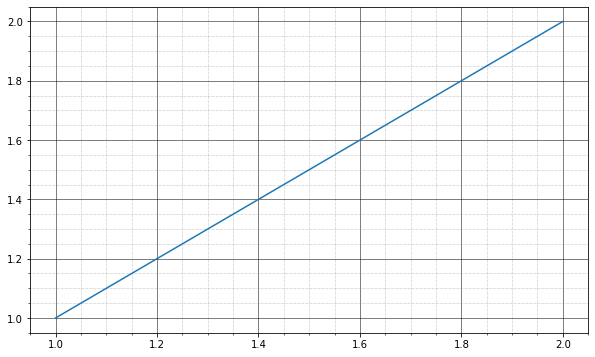

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.linspace(x_lim[0], x_lim[1], num = N, endpoint = True), res)

ax.grid(which='major',color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.savefig('plot.png', dpi=400, quality=100)
plt.show()